In [1]:
# import all liberaries for data cleaning exercise
import pandas as pd
import seaborn as sbn
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Load CSV  into a dataframe
df = pd.read_csv('./medical_raw_data.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educ

In [9]:
df.duplicated()


1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [4]:
# Detect: Identify if zip codes are missing
df['Zip'].sort_values().head()

7946    610
1340    617
5814    622
8933    624
1379    631
Name: Zip, dtype: int64

In [5]:
# Detect: Identify how many zips are missing their leading zeros.
zip_with_missing_zeros = df.loc[df['Zip'].astype(str).str.len() < 5, ['Zip']].sort_values('Zip')

number_of_zip_missing_leading_zeros = zip_with_missing_zeros['Zip'].count()
print('Number of zip code missing leading zeros:', number_of_zip_missing_leading_zeros)

Number of zip code missing leading zeros: 723


In [8]:
#Treatment: Update Zip datatype from int64 to object(str) and...
#... pad zeros to the left of the value until the width is met (width = 5).
                             
df['Zip'] = df['Zip'].astype(str).str.zfill(5)
df['Zip'].sort_values().head()

7946    00610
1340    00617
5814    00622
8933    00624
1379    00631
Name: Zip, dtype: object

In [11]:
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

<Axes: >

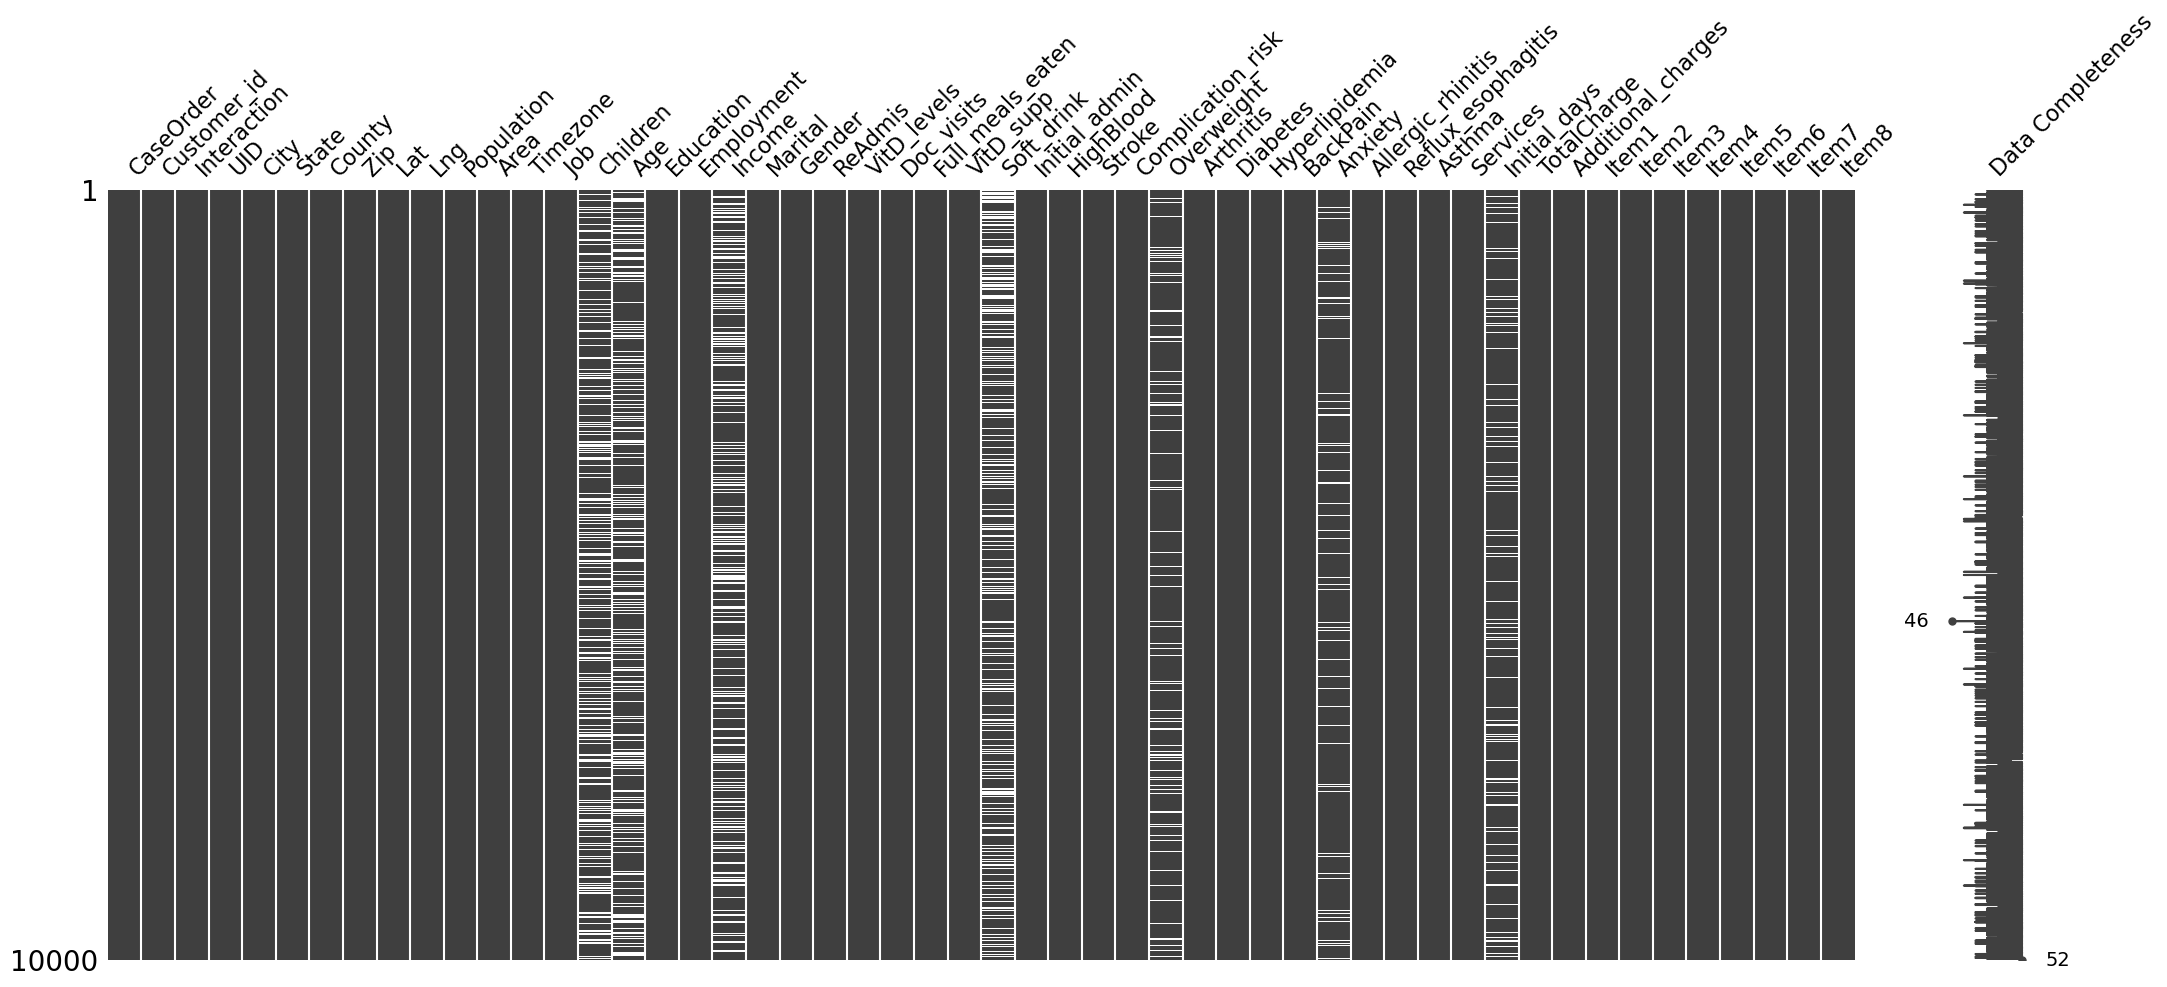

In [12]:
# visualize missing value
msno.matrix(df, labels=True)

In [13]:
df.describe()

,CaseOrder,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


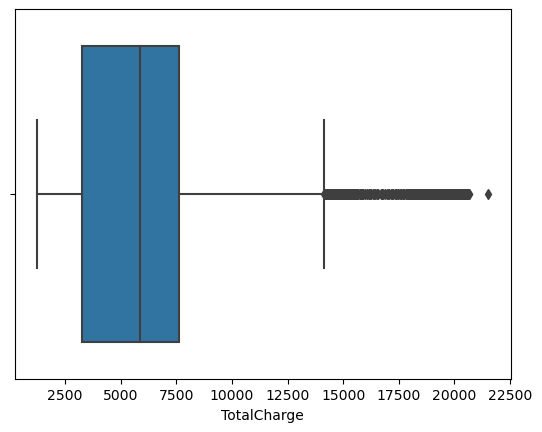

In [17]:
boxplot= sbn.boxplot(x='TotalCharge', data=df)

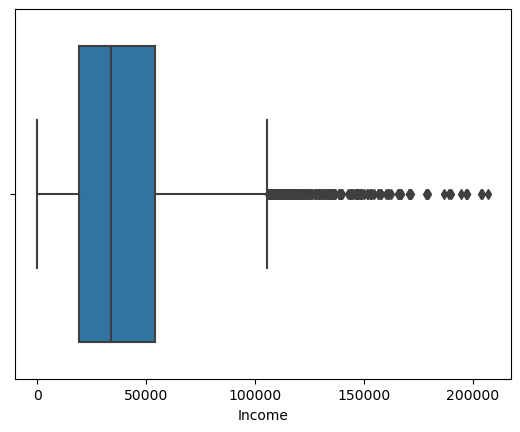

In [18]:
boxplot= sbn.boxplot(x='Income', data=df)

In [20]:
df['Zip'].unique()

array(['35621', '32446', '57110', ..., '08340', '57775', '15108'],
      dtype=object)

In [22]:
df['Timezone'] = df['Timezone'].str.strip()

In [26]:
df['Timezone'].value_counts()

America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak             